# **Лабораторная работа**
## KNN (Spaceship-Titanic)
### Гребнев Глеб
### гр. 5030102/10201

## **Импорт библиотек**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## **Загрузка данных**

In [59]:
path_to_file = "data.csv"
data = pd.read_csv(path_to_file)

**Первые несколько строк DataFrame:**

In [60]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Общая информация о данных**

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Типы данных**

In [62]:
print(data.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


**Статические свойства**

In [63]:
data.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


**Количество пропущенных значений в данных**

In [64]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## **Исследовательский анализ данных (EDA)**

**Распределение числовых признаков**

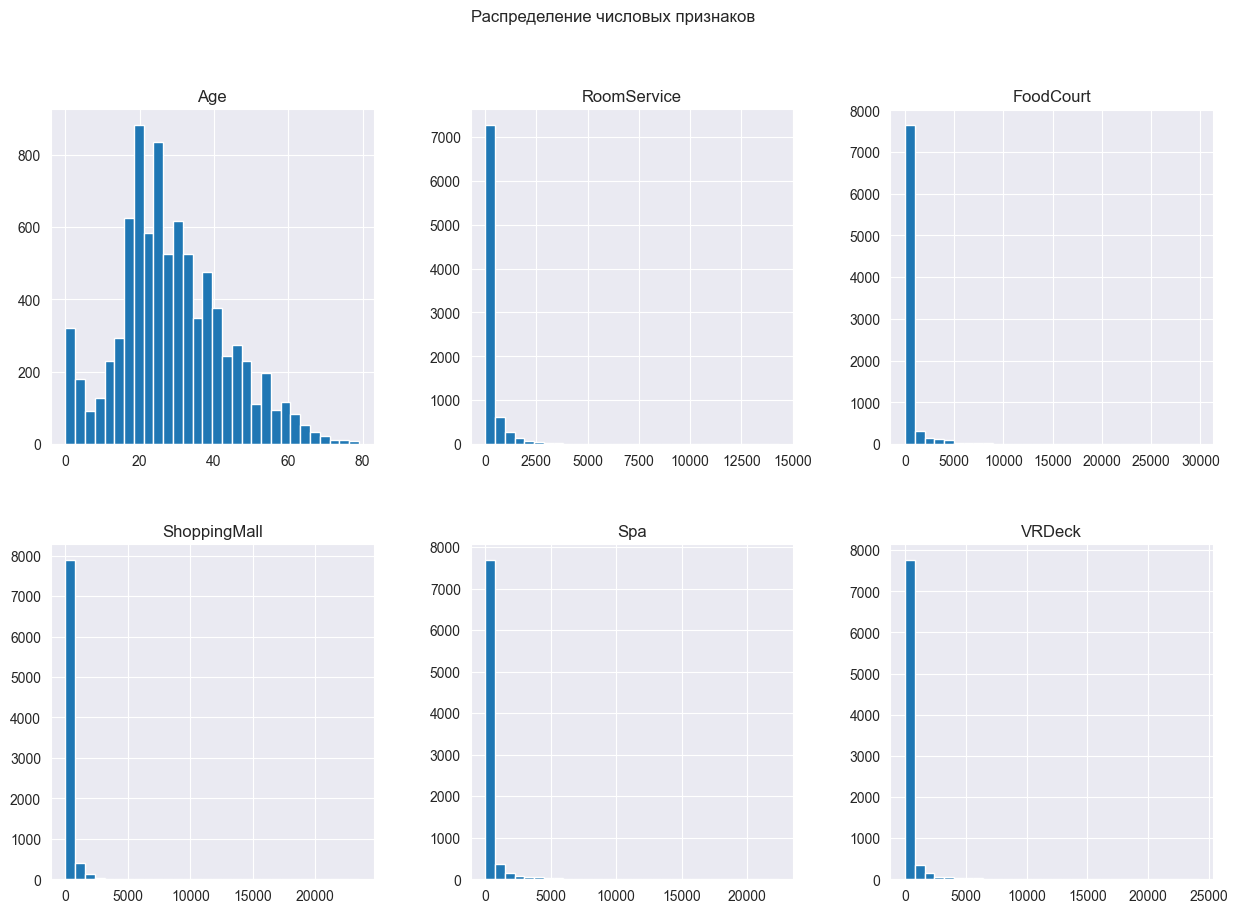

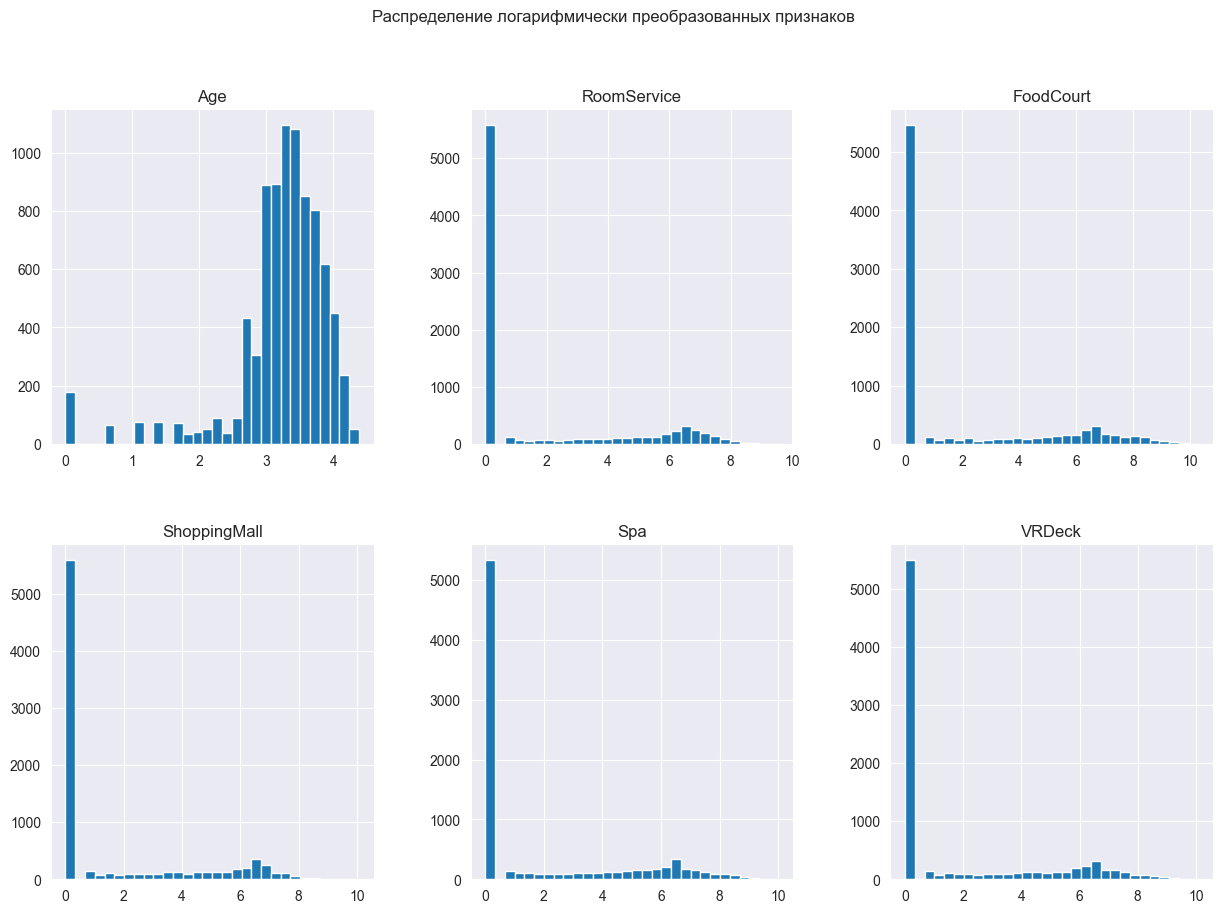

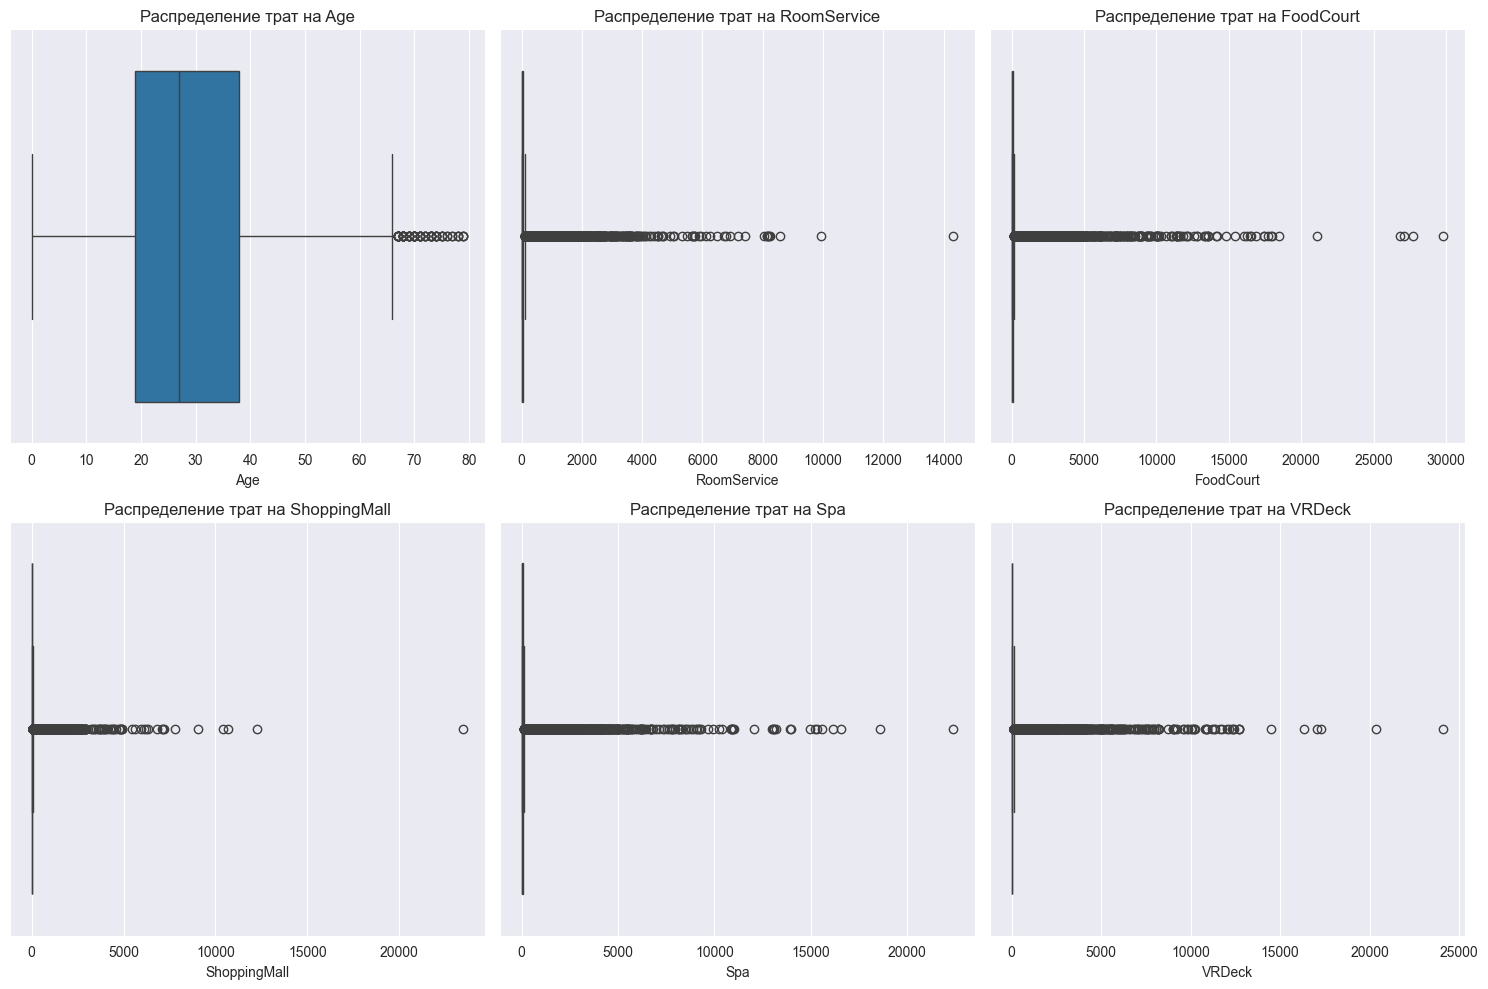

In [65]:
numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
data[numeric_cols].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Распределение числовых признаков')
plt.show()

# Логарифмическое преобразование данных
log_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
data_log = data.copy()
for col in log_cols:
    data_log[col] = np.log1p(data_log[col])  # Используем log1p для обработки нулей

# Гистограммы для логарифмически преобразованных данных
data_log[log_cols].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Распределение логарифмически преобразованных признаков')
plt.show()

# Боксплоты для числовых признаков
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f'Распределение трат на {col}')
plt.tight_layout()
plt.show()


**Статистическое описание данных**

count     8693
unique       2
top       True
freq      4378
Name: Transported, dtype: object


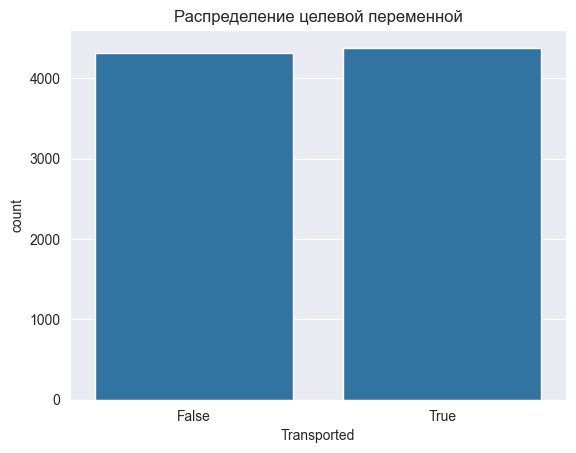

In [66]:
print(data['Transported'].describe())
# Распределение целевой переменной
sns.countplot(x='Transported', data=data)
plt.title('Распределение целевой переменной')
plt.show()

**Тепловая карта корреляции**

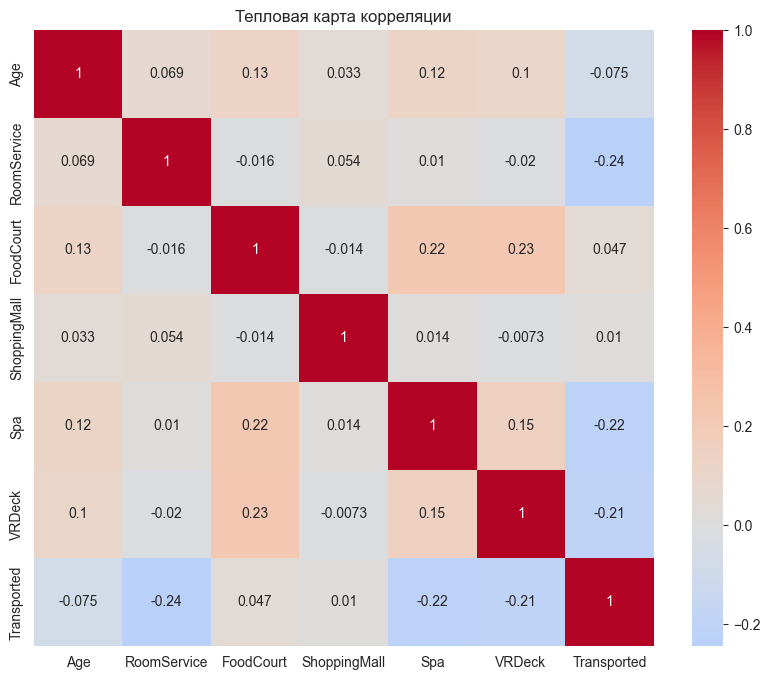

In [67]:
corr_matrix = data[numeric_cols + ['Transported']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Тепловая карта корреляции')
plt.show()

## **3. Предаврительная обработка данных**

### **1. Обработка выбросов**

In [68]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)
    return df.loc[filter]

# Удаление выбросов для всех числовых признаков
for col in numeric_cols:
    data = remove_outliers(data, col)

### Визуализация после обработки выбросов

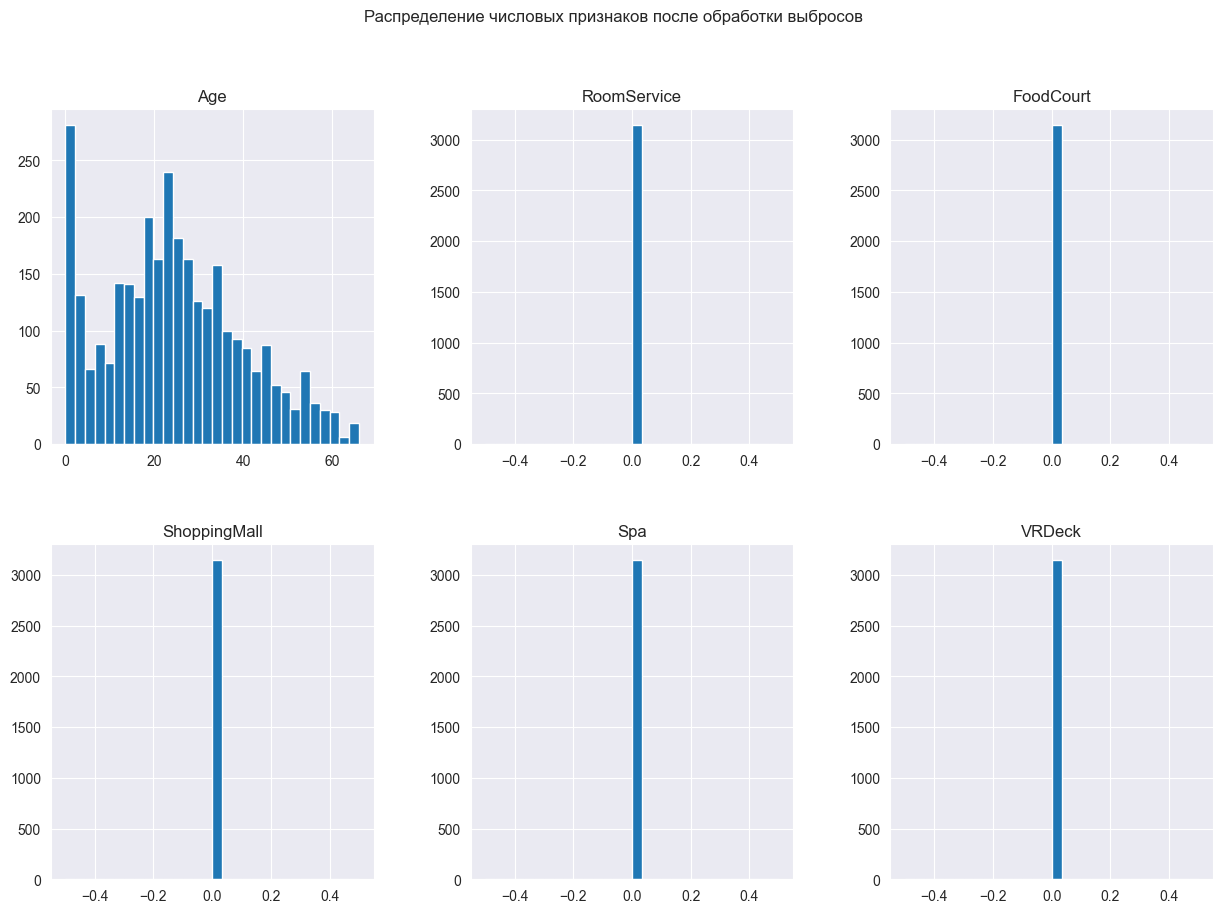

In [69]:
data[numeric_cols].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Распределение числовых признаков после обработки выбросов')
plt.show()

### **2. Кодирование категориальных признаков**

In [70]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

### **3. Масштабирование данных**

In [71]:
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

### **4. Создание новых признаков**

In [72]:
for col in numeric_cols:
    data[f'{col}_spent'] = data[col].apply(lambda x: 1 if x > 0 else 0)

### **5. Обработка пропущенных значений**

In [76]:
data = data.dropna()
print(data.dropna())

     PassengerId     Cabin       Age  RoomService  FoodCourt  ShoppingMall  \
0        0001_01     B/0/P  0.934841          0.0        0.0           0.0   
9        0008_01     B/1/P -0.676618          0.0        0.0           0.0   
18       0016_01     F/5/P  1.321591          0.0        0.0           0.0   
19       0017_01     G/0/P -1.579035          0.0        0.0           0.0   
21       0020_01     E/0/S -1.514577          0.0        0.0           0.0   
...          ...       ...       ...          ...        ...           ...   
8680     9268_01  G/1505/P  0.419174          0.0        0.0           0.0   
8681     9270_01  G/1497/S  0.548091          0.0        0.0           0.0   
8684     9274_01  G/1508/P -0.096493          0.0        0.0           0.0   
8685     9275_01    A/97/P -1.579035          0.0        0.0           0.0   
8689     9278_01  G/1499/S -0.418785          0.0        0.0           0.0   

      Spa  VRDeck               Name  Transported  ...  CryoSle

## **3. Предаврительная обработка данных**